# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
full_data = pd.merge(mouse_metadata, study_results, how="right", on=["Mouse ID"])

# Display the data table for preview
full_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [2]:
# Checking the number of mice.
print(len(full_data["Mouse ID"].unique()))

249


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mice = full_data.duplicated(subset=["Mouse ID", "Timepoint"])

duplicate_mice_ids = full_data.loc[duplicated_mice, "Mouse ID"].unique()

duplicate_mice_ids

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_data = full_data.loc[full_data['Mouse ID'].isin(duplicate_mice_ids)]

duplicate_mice_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,Propriva,Female,21,26,0,45.000000,0
137,g989,Propriva,Female,21,26,0,45.000000,0
329,g989,Propriva,Female,21,26,5,48.786801,0
360,g989,Propriva,Female,21,26,5,47.570392,0
620,g989,Propriva,Female,21,26,10,51.745156,0
681,g989,Propriva,Female,21,26,10,49.880528,0
815,g989,Propriva,Female,21,26,15,51.325852,1
869,g989,Propriva,Female,21,26,15,53.442020,0
950,g989,Propriva,Female,21,26,20,55.326122,1
1111,g989,Propriva,Female,21,26,20,54.657650,1


In [19]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = full_data.drop(full_data[full_data["Mouse ID"] == "g989"].index)
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [6]:
# Checking the number of mice in the clean DataFrame.
print(len(clean_df["Mouse ID"].unique()))


248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

mean = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
standard_de = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
standard_error = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

summary = pd.merge(mean, median, on='Drug Regimen', suffixes=(" Mean", " Median"))
summary = pd.merge(summary, variance, on='Drug Regimen', suffixes=(""," Variance"))
summary = pd.merge(summary, standard_de, on='Drug Regimen', suffixes=("", " Std. Dev."))
summary = pd.merge(summary, standard_error, on='Drug Regimen', suffixes=("", " Std. Err."))

summary.rename(
    columns={"Tumor Volume (mm3) Mean":"Mean Tumor Volume",
             "Tumor Volume (mm3) Median": "Median Tumor Volume",
             "Tumor Volume (mm3)":"Tumor Volume Variance",
             "Tumor Volume (mm3) Std. Dev.": "Tumor Volume Std. Dev.",
            "Tumor Volume (mm3) Std. Err.": "Tumor Volume Std. Err."
             })

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

summary_v2 = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(Mean=("mean"), Median=("median"), Variance=("var"), Std_Dev=("std"), Std_err=("sem"))
summary_v2

,Mean,Median,Variance,Std_Dev,Std_err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

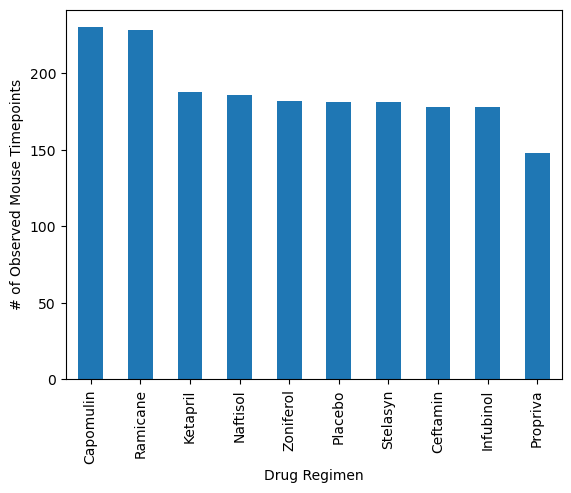

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
timepoints = clean_df.groupby("Drug Regimen")["Timepoint"].count().sort_values(ascending=False)
time_plot = timepoints.plot(kind="bar")
time_plot.set_xlabel("Drug Regimen")
time_plot.set_ylabel("# of Observed Mouse Timepoints")
plt.show()


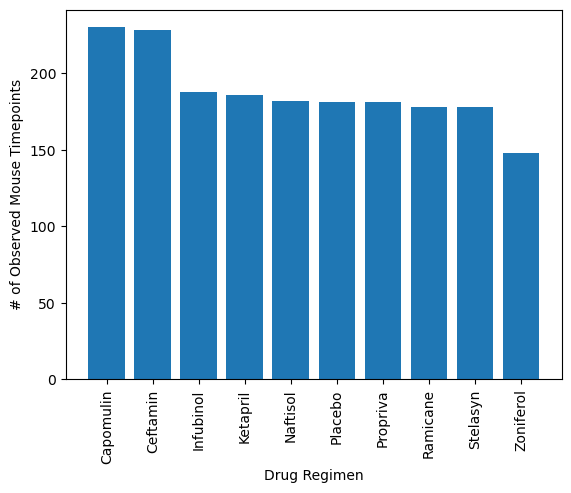

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = np.arange(0, len(summary))
timepoints = clean_df.groupby("Drug Regimen")["Timepoint"].count().sort_values(ascending=False)
plt.bar(x_axis, timepoints)
plt.xticks(range(len(summary)), summary.index, rotation='vertical')
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

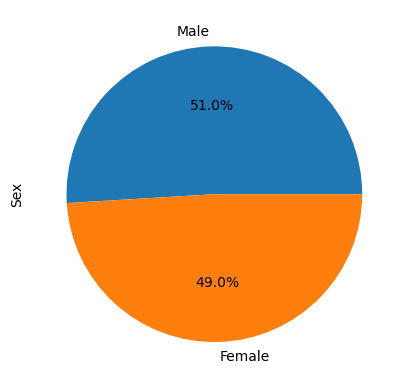

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_counts=clean_df["Sex"].value_counts()
sex_counts.plot(kind="pie", autopct= "%1.1f%%")
plt.show()

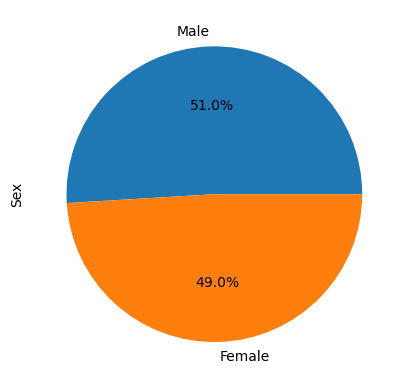

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_counts=clean_df["Sex"].value_counts()
labels=sex_counts.index
plt.pie(sex_counts, labels=labels, autopct= "%1.1f%%")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_capomulin = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"].groupby("Mouse ID")["Timepoint"].max()
greatest_ramicane = clean_df.loc[clean_df["Drug Regimen"] == "Ramicane"].groupby("Mouse ID")["Timepoint"].max()
greatest_infubinol = clean_df.loc[clean_df["Drug Regimen"] == "Infubinol"].groupby("Mouse ID")["Timepoint"].max()
greatest_ceftamin = clean_df.loc[clean_df["Drug Regimen"] == "Ceftamin"].groupby("Mouse ID")["Timepoint"].max()

greatest_timepoints = pd.merge(greatest_capomulin, greatest_ramicane,  how='outer', left_on=['Mouse ID','Timepoint'], right_on = ['Mouse ID','Timepoint'])
greatest_timepoints = pd.merge(greatest_timepoints, greatest_infubinol,  how='outer', left_on=['Mouse ID','Timepoint'], right_on = ['Mouse ID','Timepoint'])
greatest_timepoints = pd.merge(greatest_timepoints, greatest_ceftamin, how='outer', left_on=['Mouse ID','Timepoint'], right_on = ['Mouse ID','Timepoint'])
greatest_timepoints
final_df = pd.merge(clean_df, greatest_timepoints, on=["Mouse ID", "Timepoint"], how="inner")

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_df.set_index("Mouse ID", inplace=True)
final_df

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
u153,Ceftamin,Female,11,25,0,45.000000,0
b447,Ceftamin,Male,2,30,0,45.000000,0
x226,Ceftamin,Male,23,28,0,45.000000,0
t573,Ceftamin,Female,15,27,0,45.000000,0
c326,Infubinol,Female,18,25,5,36.321346,0
...,...,...,...,...,...,...,...
a644,Ramicane,Female,7,17,45,32.978522,1
i177,Ramicane,Male,10,18,45,33.562402,3
r944,Capomulin,Male,12,25,45,41.581521,2


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = final_df["Drug Regimen"].unique().tolist()

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    # Locate the rows which contain mice on each drug and get the tumor volumes

    # add subset     
    
    # Determine outliers using upper and lower bounds
for regimen in treatments:
    print(regimen+":")
    qs = final_df.loc[final_df["Drug Regimen"] == regimen, "Tumor Volume (mm3)"].quantile([0.25, 0.5, 0.75])
    IQR = qs[0.75] - qs[0.25]
    lower_whisker = qs[0.25] - IQR * 1.5
    upper_whisker = qs[0.75] + IQR * 1.5
    
    subset = final_df.loc[final_df["Drug Regimen"] == regimen, "Tumor Volume (mm3)"]
    
    # Add subset to tumor_vol_data
   
    tumor_vol_data.append(subset)
    potential_outliers = final_df.loc[(final_df["Drug Regimen"] == regimen) & ((final_df["Tumor Volume (mm3)"] < lower_whisker) | (final_df["Tumor Volume (mm3)"] > upper_whisker)), "Tumor Volume (mm3)"]
    print(f'{regimen} potential outliers:{potential_outliers}\n')

    
    

Ceftamin:
Ceftamin potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)

Infubinol:
Infubinol potential outliers:Mouse ID
c326    36.321346
Name: Tumor Volume (mm3), dtype: float64

Ramicane:
Ramicane potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)

Capomulin:
Capomulin potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)



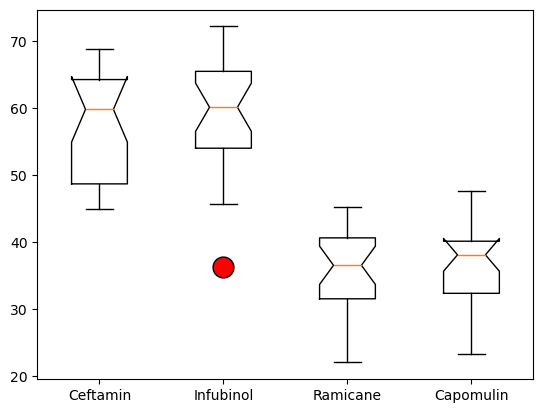

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()

# As the marker for the outlier value was too little, I looked for a reference to make 
# it more appealing, and I found the notch and the flierprops parameters:
ax1.boxplot(tumor_vol_data, labels=treatments, notch=True, flierprops={'markersize':15, 'markerfacecolor':'red'})
plt.show()

## Line and Scatter Plots

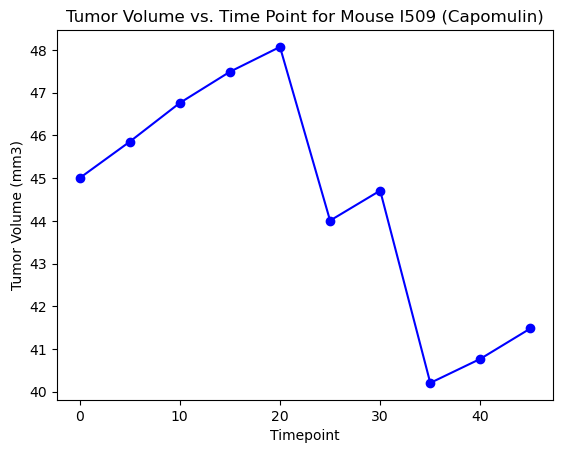

In [22]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
clean_df.set_index('Mouse ID', inplace=True) # just call this once 
mouse_volume = clean_df.loc['l509', "Tumor Volume (mm3)"]
mouse_tp = clean_df.loc['l509', "Timepoint"]
# Create the line plot
plt.plot(mouse_tp, mouse_volume, marker='o', linestyle='-', color='blue')

# Set the labels and title
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Volume vs. Time Point for Mouse I509 (Capomulin)')

# Show the plot
plt.show()

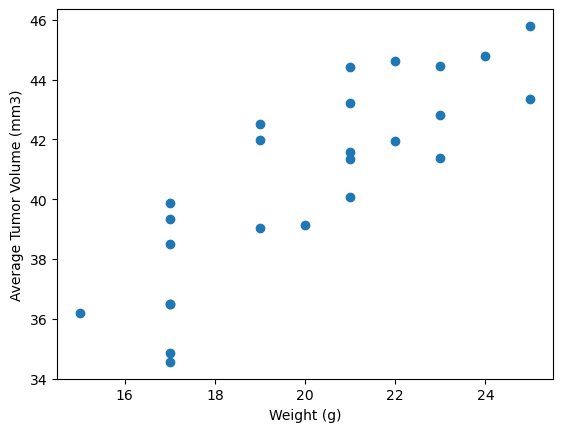

In [23]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

capomulin_data = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
mouse_weights = capomulin_data.groupby("Mouse ID")["Weight (g)"].mean()
avg_tumor_volumes = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

plt.scatter(mouse_weights, avg_tumor_volumes)

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Show the plot
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


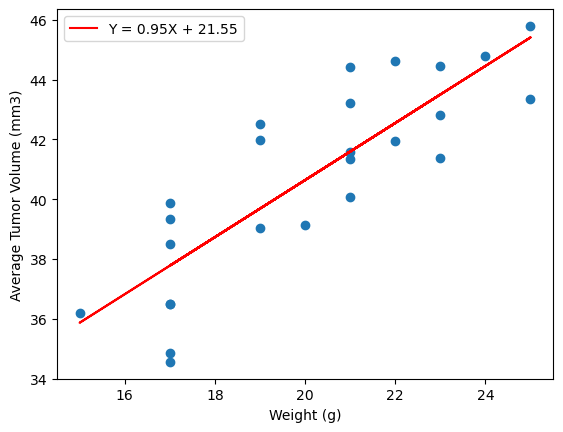

In [37]:
# Import module for the linear regression
from scipy.stats import linregress

# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

p_correlation = st.pearsonr(avg_tumor_volumes, mouse_weights)
# print(p_correlation[0]) # If I print p_correlation, I get two values, so I decided 
# to try calling one of them as if it was a list, and it worked!
print(f'The correlation between mouse weight and the average tumor volume is {round(p_correlation[0], 2)}')

plt.scatter(mouse_weights, avg_tumor_volumes)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# For the linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(mouse_weights, avg_tumor_volumes)

regression_model= model = f'Y = {round(slope, 2)}X + {round(intercept, 2)}'

y_values = mouse_weights * slope + intercept

plt.plot(mouse_weights, y_values, color="red", label=regression_model)
plt.legend()
# Show the plot
plt.show()



